# Plot S4 vs time in function of: frequency and constelation

In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

## 1) Import scintilacion files (.s4)  

In [3]:
directorio = "/home/luis/Desktop/Proyects_Files/LISN/GPSs/Tareas/Graficas_cintilaciones/Input_data/Data_procesada/"
file_name = "ljic_200926.s4"
df1 = pd.read_csv(directorio + file_name, header=None, sep="\t")
df1.head(3)

/home/luis/anaconda3/envs/tutorial_pandas/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (7,8,13,14,15,16,31,32,37,38,103,104,109,110,111,112,113,127,128,129,130,134,135,138,139,153,154,160,162,163,164,199,200,205,206,207,208,223,224,229,230,247,248,253,254,255,256,271,272,277,278,295,296,297,298,301,302,303,304,306,307,369,370,378,379,415,416,421,422,423,463,464,469,470,471,472,473,511,512,517,518,519,520,521,544,545,583,584,589,590,591,592,593,607,608,613,614,615,616,631,632,637,638,655,656,661,662,663,664,665,679,680,683,684,685,686,695,696,697,703,704,707,708,709,710,711,712,719,720,721,722,731,732,743,744,745,751,752,755,756,757,758,767,768,806,807,808,809,817,818,819,820,825,826,834,835,836,837,838,844,849,850,858,859,860,861,862,868,871,872,873,874,877,878,879,880,881,882,883,884,885,886,891,892,897,898,906,907,908,909,910) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(co

,0,1,2,3,4,5,6,7,8,9,...,906,907,908,909,910,911,912,913,914,915
0,20,270,60,35,G10,99.0,72.0,0.023,0.025,0.042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,270,120,35,G10,101.0,72.0,0.022,0.024,0.036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,270,180,35,G10,102.0,72.0,0.023,0.025,0.035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Columns: 916 entries, 0 to 915
dtypes: float64(161), int64(4), object(751)
memory usage: 10.1+ MB


## 2. Process that dataframe

In [5]:
# Eliminacion de ciertas columnas
for i in df1.columns:
    if i>3:
        m = (i-4)%24
        if m == 1: del df1[i]
        elif m == 2: del df1[i]
        elif m >= 9: del df1[i]

#df1.head()
df1.head()

,0,1,2,3,4,7,8,9,10,11,...,874,875,876,892,895,896,897,898,899,900
0,20,270,60,35,G10,0.023,0.025,0.042,0.036,0.023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,270,120,35,G10,0.022,0.024,0.036,0.035,0.022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,270,180,35,G10,0.023,0.025,0.035,0.036,0.024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,270,240,35,G10,0.023,0.025,0.042,0.037,0.025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,270,300,35,G10,0.020,0.024,0.036,0.037,0.029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Columns: 270 entries, 0 to 900
dtypes: float64(28), int64(4), object(238)
memory usage: 3.0+ MB


In [7]:
df1.columns = np.arange(len(df1.columns)) # Rename the columns 
df1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0,20,270,60,35,G10,0.023,0.025,0.042,0.036,0.023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,270,120,35,G10,0.022,0.024,0.036,0.035,0.022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Creacion de un nuevo dataframe
df2 = pd.DataFrame(columns=range(10))

# Se llenan el resto de valores
T = 7 # Period of dataset
for i in range(len(df1)):
    for h in range(df1.iloc[i,3]): # that cell contains the number of measurements 
        m = df1.iloc[i,[0,1,2,4+T*h,5+T*h,6+T*h,7+T*h,8+T*h,9+T*h,10+T*h]]
        m.index = range(len(m))
        df2 = df2.append(m)

df2.index = range(len(df2))
df2.head()

,0,1,2,3,4,5,6,7,8,9
0,20,270,60,G10,0.023,0.025,0.042,0.036,0.023,0.023
1,20,270,60,G16,0.075,0.039,nan,nan,nan,nan
2,20,270,60,G20,0.111,0.051,nan,nan,nan,nan
3,20,270,60,G21,0.103,0.060,nan,nan,nan,nan
4,20,270,60,G26,0.025,0.029,0.035,0.036,0.021,0.022


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46199 entries, 0 to 46198
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       46199 non-null  object
 1   1       46199 non-null  object
 2   2       46199 non-null  object
 3   3       46199 non-null  object
 4   4       46199 non-null  object
 5   5       46199 non-null  object
 6   6       46199 non-null  object
 7   7       46199 non-null  object
 8   8       46199 non-null  object
 9   9       46199 non-null  object
dtypes: object(10)
memory usage: 3.5+ MB


In [10]:
# Change type object to double 
for i in range(3):
    df2[i] = df2[i].astype("int")

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46199 entries, 0 to 46198
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       46199 non-null  int64 
 1   1       46199 non-null  int64 
 2   2       46199 non-null  int64 
 3   3       46199 non-null  object
 4   4       46199 non-null  object
 5   5       46199 non-null  object
 6   6       46199 non-null  object
 7   7       46199 non-null  object
 8   8       46199 non-null  object
 9   9       46199 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.5+ MB


In [12]:
# Change data type to str
for i in range(6):
    df2[4+i] = df2[4+i].astype("str").str.strip().astype("float")
df2.head()

,0,1,2,3,4,5,6,7,8,9
0,20,270,60,G10,0.023,0.025,0.042,0.036,0.023,0.023
1,20,270,60,G16,0.075,0.039,NaN,NaN,NaN,NaN
2,20,270,60,G20,0.111,0.051,NaN,NaN,NaN,NaN
3,20,270,60,G21,0.103,0.060,NaN,NaN,NaN,NaN
4,20,270,60,G26,0.025,0.029,0.035,0.036,0.021,0.022


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46199 entries, 0 to 46198
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       46199 non-null  int64  
 1   1       46199 non-null  int64  
 2   2       46199 non-null  int64  
 3   3       46199 non-null  object 
 4   4       46046 non-null  float64
 5   5       46046 non-null  float64
 6   6       32202 non-null  float64
 7   7       32202 non-null  float64
 8   8       24368 non-null  float64
 9   9       24368 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.5+ MB


In [14]:
# Rename columns 
df2.columns = ["YY", "DOY", "SOD", "PRN", "S4_sig1", "S4_sig1_corr", "S4_sig2", "S4_sig2_corr", "S4_sig3", "S4_sig3_corr"]
df2.head()

,YY,DOY,SOD,PRN,S4_sig1,S4_sig1_corr,S4_sig2,S4_sig2_corr,S4_sig3,S4_sig3_corr
0,20,270,60,G10,0.023,0.025,0.042,0.036,0.023,0.023
1,20,270,60,G16,0.075,0.039,NaN,NaN,NaN,NaN
2,20,270,60,G20,0.111,0.051,NaN,NaN,NaN,NaN
3,20,270,60,G21,0.103,0.060,NaN,NaN,NaN,NaN
4,20,270,60,G26,0.025,0.029,0.035,0.036,0.021,0.022


In [15]:
# Calculate the corrected S4
def get_correctedS4(row):
    s4 = row[0]
    correction= row[1]
    
    # Treat nan numbers 
    if pd.isnull(s4) or pd.isnull(correction):
        return np.nan
    else:
        # Calculate the corrected S4
        x = s4**2-correction**2
        if x>0:
            return x**0.5
        else:
            return 0    

for i in range(3):        
    df2[f"S4_sig{i+1}"] = df2[[f"S4_sig{i+1}",f"S4_sig{i+1}_corr"]].apply(get_correctedS4, axis=1)
df2.head()

,YY,DOY,SOD,PRN,S4_sig1,S4_sig1_corr,S4_sig2,S4_sig2_corr,S4_sig3,S4_sig3_corr
0,20,270,60,G10,0.000000,0.025,0.021633,0.036,0.0,0.023
1,20,270,60,G16,0.064062,0.039,NaN,NaN,NaN,NaN
2,20,270,60,G20,0.098590,0.051,NaN,NaN,NaN,NaN
3,20,270,60,G21,0.083720,0.060,NaN,NaN,NaN,NaN
4,20,270,60,G26,0.000000,0.029,0.000000,0.036,0.0,0.022


In [16]:
# Delete some columns
del df2["S4_sig1_corr"]
del df2["S4_sig2_corr"]
del df2["S4_sig3_corr"]
df2.head()

,YY,DOY,SOD,PRN,S4_sig1,S4_sig2,S4_sig3
0,20,270,60,G10,0.000000,0.021633,0.0
1,20,270,60,G16,0.064062,NaN,NaN
2,20,270,60,G20,0.098590,NaN,NaN
3,20,270,60,G21,0.083720,NaN,NaN
4,20,270,60,G26,0.000000,0.000000,0.0


In [17]:
# Sort values by "PRN" and "SOD" 
df2 = df2.sort_values(["PRN","SOD"])

# Reindex in ascendent order 
df2.index = range(len(df2))

df2

,YY,DOY,SOD,PRN,S4_sig1,S4_sig2,S4_sig3
0,20,270,31380,C14,NaN,0.000000,0.069426
1,20,270,31440,C14,0.000000,0.097627,0.073157
2,20,270,31500,C14,0.121017,0.091929,0.093118
3,20,270,31560,C14,0.000000,0.051962,0.044227
4,20,270,31620,C14,0.028636,0.027111,0.078708
...,...,...,...,...,...,...,...
46194,20,270,86100,S38,0.008888,0.006708,NaN
46195,20,270,86160,S38,0.000000,0.000000,NaN
46196,20,270,86220,S38,0.000000,0.006708,NaN
46197,20,270,86280,S38,0.000000,0.000000,NaN


In [18]:
# Convert to datetime data type 
def change2datetime(row):
    yy = int(row[0])
    doy = int(row[1])
    sod = int(row[2])
    
    if sod < 0: 
        doy = doy -1
        sod = 60*60*24+sod      
    
    cdate = str(yy)+"-"+str(doy)+"-"+str(datetime.timedelta(seconds=sod))
    fecha = datetime.datetime.strptime(cdate, "%y-%j-%X")
    
    return fecha  

# Convert and assign
m = df2.apply(change2datetime, axis=1)

# Create the new column
df2.insert(0,column="DateTime",value=0)
df2["DateTime"] = m

# Delete some columns 
del df2["YY"]
del df2["DOY"]
del df2["SOD"]

df2

,DateTime,PRN,S4_sig1,S4_sig2,S4_sig3
0,2020-09-26 08:43:00,C14,NaN,0.000000,0.069426
1,2020-09-26 08:44:00,C14,0.000000,0.097627,0.073157
2,2020-09-26 08:45:00,C14,0.121017,0.091929,0.093118
3,2020-09-26 08:46:00,C14,0.000000,0.051962,0.044227
4,2020-09-26 08:47:00,C14,0.028636,0.027111,0.078708
...,...,...,...,...,...
46194,2020-09-26 23:55:00,S38,0.008888,0.006708,NaN
46195,2020-09-26 23:56:00,S38,0.000000,0.000000,NaN
46196,2020-09-26 23:57:00,S38,0.000000,0.006708,NaN
46197,2020-09-26 23:58:00,S38,0.000000,0.000000,NaN


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46199 entries, 0 to 46198
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  46199 non-null  datetime64[ns]
 1   PRN       46199 non-null  object        
 2   S4_sig1   46046 non-null  float64       
 3   S4_sig2   32202 non-null  float64       
 4   S4_sig3   24368 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.8+ MB


In [20]:
df2.set_index("DateTime", inplace=True)
df2.head()

,PRN,S4_sig1,S4_sig2,S4_sig3
DateTime,,,,
2020-09-26 08:43:00,C14,NaN,0.000000,0.069426
2020-09-26 08:44:00,C14,0.000000,0.097627,0.073157
2020-09-26 08:45:00,C14,0.121017,0.091929,0.093118
2020-09-26 08:46:00,C14,0.000000,0.051962,0.044227
2020-09-26 08:47:00,C14,0.028636,0.027111,0.078708


Congratulations! The dataframe is ready to plot (y)

## 3. Plot for each frequency and constellation

In [21]:
# Identify the available PRNs
prns = df2["PRN"].str[0].unique() # extract the first character of each cell 
prns

array(['C', 'E', 'G', 'R', 'S'], dtype=object)

In [ ]:
# Get current UTC date
#fecha = datetime.datetime.utcnow()
#fecha = fecha.strftime("%Y/%m/%d")
#fecha

In [76]:
# Get file date
file_name = "ljic_200926.s4"
fecha = file_name[5:-3]
fecha2 = datetime.datetime.strptime(fecha, "%y%m%d")
fecha3 = datetime.datetime.strftime(fecha2,"%Y/%m/%d")
fecha2

datetime.datetime(2020, 9, 26, 0, 0)

In [82]:
fecha2_tomorrow = fecha2 + pd.DateOffset(days=1)
fecha2_tomorrow = fecha2_tomorrow.to_pydatetime()
fecha2_tomorrow

datetime.datetime(2020, 9, 27, 0, 0)

In [24]:
# Get the name for a given PRN code
def get_prn_name(prn_code):
    if prn_code == 'G': return 'GPS'
    elif prn_code == 'R': return 'GLONASS'
    elif prn_code == 'E': return 'GALILEO'
    elif prn_code == 'S': return 'SBAS'
    elif prn_code == 'C': return 'BEIDOU'
    elif prn_code == 'J': return 'QZSS'
    elif prn_code == 'I': return 'IRNSS'
    else:
        return 'Incorrect PRN code!'

In [25]:
# Get the frequency name for a given PRN code and Freq code
def get_sig_name(prn, sig):
    if sig == 1:
        if prn == 'G' or prn == 'R' or prn == 'S' or prn == 'J':
            return 'L1CA'
        elif prn == 'E':
            return 'L1BC'
        elif prn == 'C':
            return 'B1'
        elif prn == 'I':
            return 'L5'
        else: 
            return "Insert a right code!"
    elif sig == 2:
        if prn == 'G' or prn == 'R' or prn == 'J':
            return 'L2C'
        elif prn == 'E':
            return 'E5a'
        elif prn == 'C':
            return 'B2'
        elif prn == 'S':
            return 'L5'
        else: 
            return "Insert a right code!"
    elif sig == 3:
        if prn == 'G' or prn == 'J':
            return 'L5'
        elif prn == 'E':
            return 'E5b'
        elif prn == 'C':
            return 'B3'
        else: 
            return "Insert a right code!"
    else:
        "Insert a right code!"

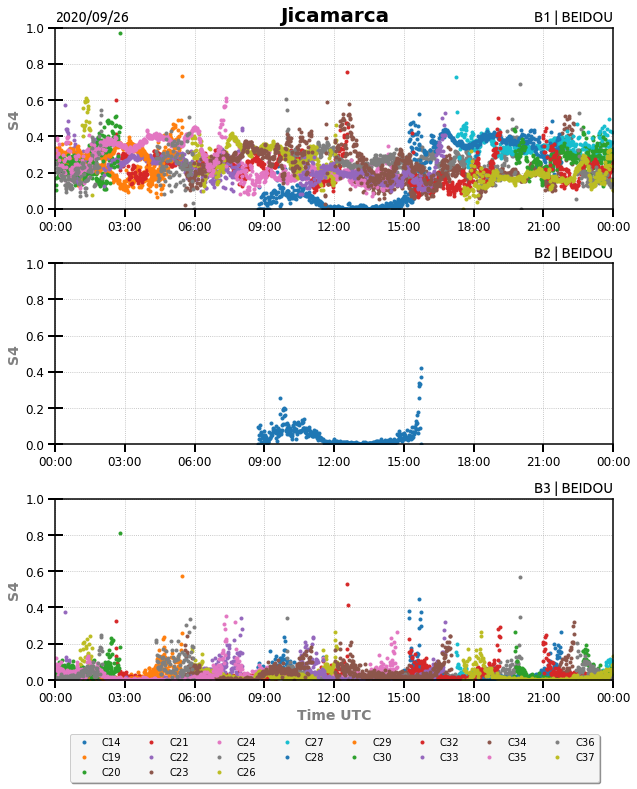

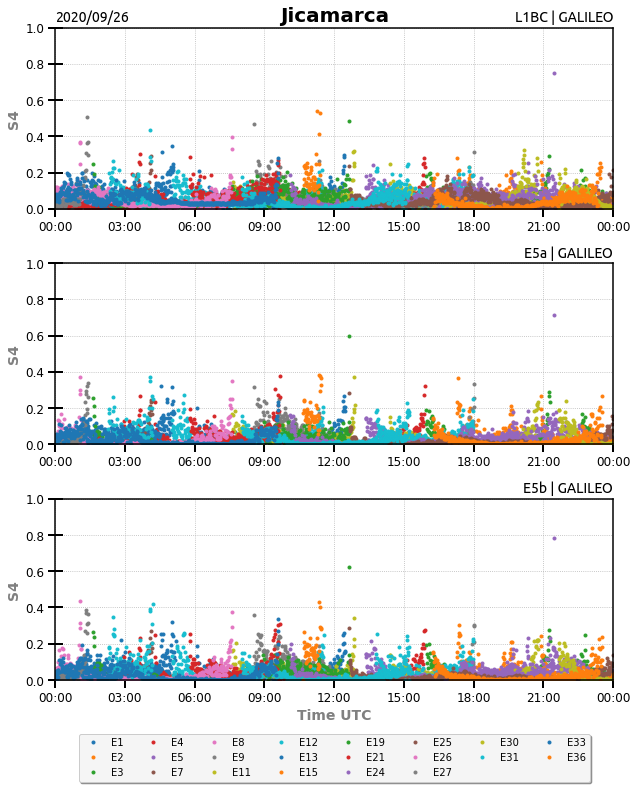

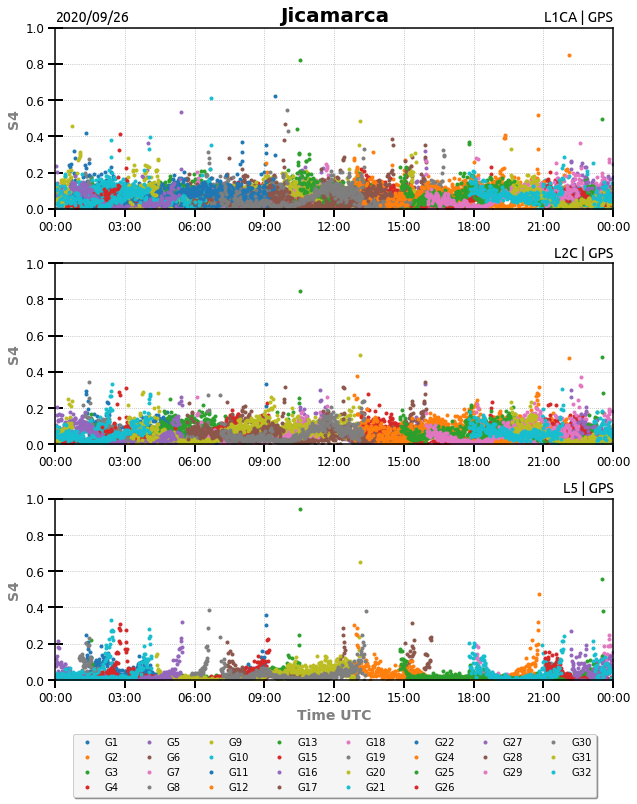

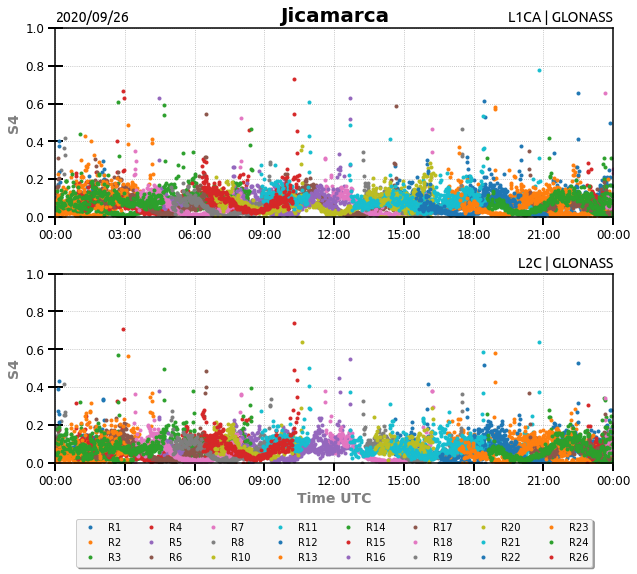

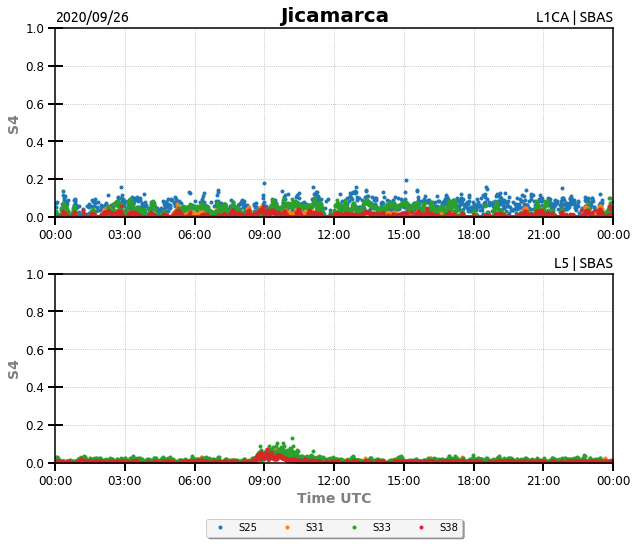

In [84]:
# Plot for each PRN and freq code
#
for prn in prns:
    mask = df2["PRN"].str.contains(prn)
    df3 = df2[mask]
    
    # Check no null columns 
    sig_n = df3.columns[1:] # Extract only the columns which have freq info
    n_subplots = 0
    for sig_i in sig_n:
        if df3[sig_i].isna().sum() < len(df3):
            n_subplots += 1
            
    # Plot for each PRN
    fig,ax = plt.subplots(n_subplots, figsize=(10,4*n_subplots))#, gridspec_kw={'width_ratios': [3, 1]})
    for i in range(len(ax)):
        sig = i+1 # frequency 
        first = 0 # first graph 
        last = len(ax) - 1 # last graph
        
        # Plot data by prn and s4_sig
        prn_values = df3["PRN"].unique().tolist()
        prn_values.sort(key=lambda x: int(x[1:]))
        
        for value in prn_values:
            mask = df3["PRN"] == value
            df4 = df3[mask]["S4_sig" + str(sig)]
            
            ax[i].plot(df4.index, df4.values, '.', label= value)
            #df3.groupby("PRN")["S4_sig" + str(sig)].plot(ax=ax[i], style='.')

        # Set label and title names
        if i == first:
            ax[i].set_title("Jicamarca", fontsize=20, fontweight='bold')
            ax[i].set_title(fecha3, loc="left", fontsize=14, style='normal', name='Ubuntu')

        ax[i].set_title(get_sig_name(prn, sig) + f" | {get_prn_name(prn)}", loc="right", fontsize=14, name = 'Ubuntu')
        ax[i].set_ylabel("S4", fontsize=14, weight='bold', color='gray')
        
        if i == last:
            ax[i].set_xlabel("Time UTC", fontsize=14, weight='bold', color='gray')
        else:
            ax[i].set_xlabel("", fontsize=14, weight='bold', color='gray')    
            
        # Set axis limits 
        ax[i].set_xlim([fecha2, fecha2_tomorrow])
        ax[i].set_ylim([0,1])

        # Rectangle frame width 
        for axis in ['top','bottom','left','right']:
            ax[i].spines[axis].set_linewidth(1.5)

        # Ticks format 
        ax[i].xaxis.set_tick_params(width=2, length=8, which='both', direction='out')
        ax[i].yaxis.set_tick_params(width=2, length=15, direction='inout')
        ax[i].tick_params(axis='x', which='both', labelsize=12)
        ax[i].tick_params(axis='y', labelsize=12)
        
        myFmt = DateFormatter("%H:%M")
        ax[i].xaxis.set_major_formatter(myFmt)
        ax[i].xaxis.set_minor_formatter(myFmt)

        # Grid and legend 
        ax[i].grid(which='both', axis='both', ls=':')
        if i == last:
            leg = ax[i].legend(loc='upper center', fancybox=True, shadow=True, bbox_to_anchor=(0.5, -0.27), ncol=8, facecolor='whitesmoke')

    plt.subplots_adjust(hspace=0.3)
    
    # Save figure as pdf
    file_path = "/home/luis/Desktop/Proyects_Files/LISN/GPSs/Tareas/Graficas_cintilaciones/Output_data/"
    file_name = f"s4_{get_prn_name(prn)}.pdf"
    
    plt.savefig(file_path + file_name, bbox_inches='tight')

ValueError: year 73061 is out of range

<Figure size 720x864 with 3 Axes>

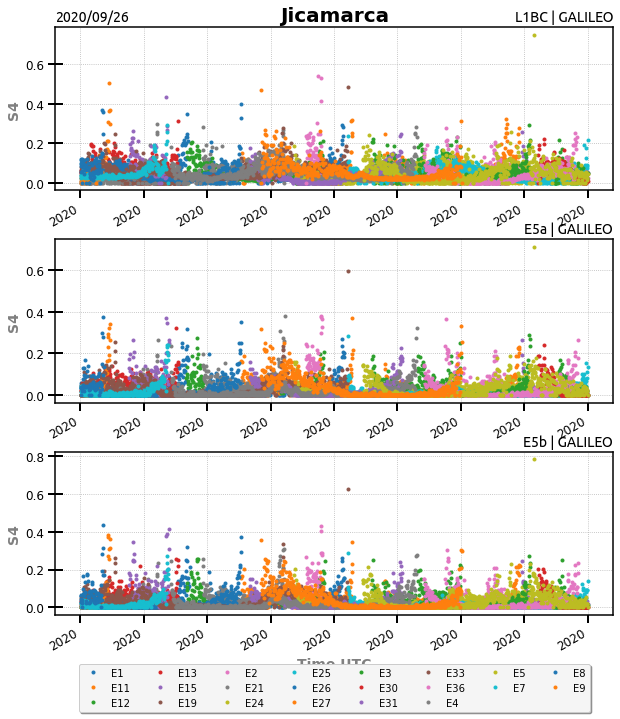

ValueError: year 73061 is out of range

<Figure size 720x864 with 3 Axes>

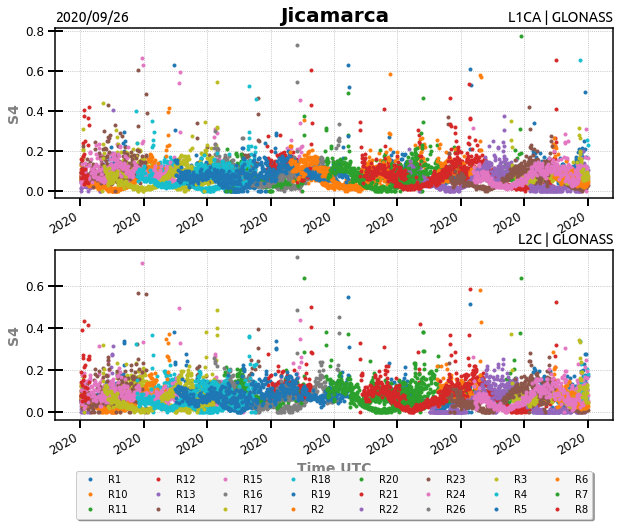

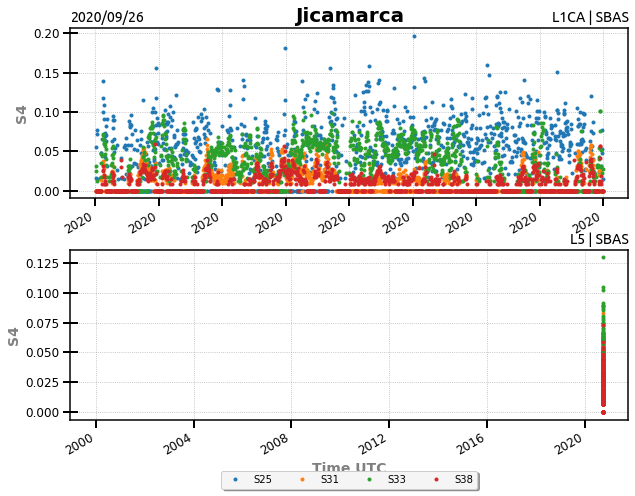

In [91]:
# Plot for each PRN and freq code
#
for prn in prns:
    mask = df2["PRN"].str.contains(prn)
    df3 = df2[mask]
    
    # Check no null columns 
    sig_n = df3.columns[1:] # Extract only the columns which have freq info
    n_subplots = 0
    for sig_i in sig_n:
        if df3[sig_i].isna().sum() < len(df3):
            n_subplots += 1
            
    # Plot for each PRN
    fig,ax = plt.subplots(n_subplots, figsize=(10,4*n_subplots))#, gridspec_kw={'width_ratios': [3, 1]})
    for i in range(len(ax)):
        sig = i+1 # frequency 
        first = 0 # first graph 
        last = len(ax) - 1 # last graph
        
        # Plot data by prn and s4_sig
        df3.groupby("PRN")["S4_sig" + str(sig)].plot(ax=ax[i], style='.')

        # Set label and title names
        if i == first:
            ax[i].set_title("Jicamarca", fontsize=20, fontweight='bold')
            ax[i].set_title(fecha3, loc="left", fontsize=14, style='normal', name='Ubuntu')

        ax[i].set_title(get_sig_name(prn, sig) + f" | {get_prn_name(prn)}", loc="right", fontsize=14, name = 'Ubuntu')
        ax[i].set_ylabel("S4", fontsize=14, weight='bold', color='gray')
        
        if i == last:
            ax[i].set_xlabel("Time UTC", fontsize=14, weight='bold', color='gray')
        else:
            ax[i].set_xlabel("", fontsize=14, weight='bold', color='gray')    

        # Rectangle frame width 
        for axis in ['top','bottom','left','right']:
            ax[i].spines[axis].set_linewidth(1.5)

        # Ticks format 
        ax[i].xaxis.set_tick_params(width=2, length=8, which='both', direction='out')
        ax[i].yaxis.set_tick_params(width=2, length=15, direction='inout')
        ax[i].tick_params(axis='x', which='both', labelsize=12)
        ax[i].tick_params(axis='y', labelsize=12)
        
        #ax[i].set_xticks(df3.index)
        myFmt = DateFormatter("%Y")
        ax[i].xaxis.set_major_formatter(myFmt)
        ax[i].xaxis.set_minor_formatter(myFmt)

        # Grid and legend 
        ax[i].grid(which='both', axis='both', ls=':')
        if i == last:
            leg = ax[i].legend(loc='upper center', fancybox=True, shadow=True, bbox_to_anchor=(0.5, -0.27), ncol=8, facecolor='whitesmoke')

    plt.subplots_adjust(hspace=0.3)
    
    # Save figure as pdf
    file_path = "/home/luis/Desktop/Proyects_Files/LISN/GPSs/Tareas/Graficas_cintilaciones/Output_data/"
    file_name = f"s4_{get_prn_name(prn)}.pdf"
    
    #plt.savefig(file_path + file_name, bbox_inches='tight')

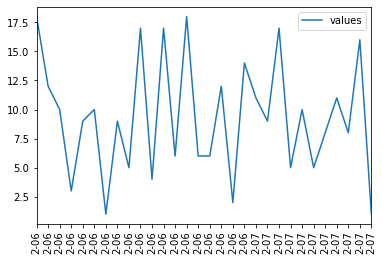

In [97]:
# sample data
import numpy as np
import pandas as pd

N = 30
drange = pd.date_range("2014-01", periods=N, freq="MS")
values = {'values':np.random.randint(1,20,size=N)}
df = pd.DataFrame(values, index=drange)

# use formatters to specify major and minor ticks
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()
#ax.plot(df.index, df.values)
df.plot(ax=ax)
ax.set_xticks(df.index)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=90)  

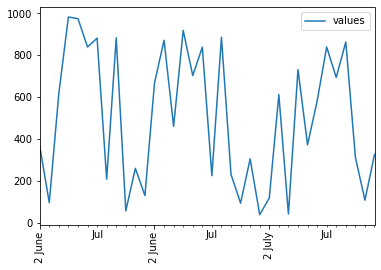

In [99]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
df = pd.DataFrame({'values':np.random.randint(0,1000,36)},index=pd.date_range(start='2014-01-01',end='2016-12-31',freq='M'))
fig,ax1 = plt.subplots()
#plt.plot(df.index,df.values)
df.plot(ax=ax1)
monthyearFmt = mdates.DateFormatter('%Y %B')
ax1.xaxis.set_major_formatter(monthyearFmt)
_ = plt.xticks(rotation=90)

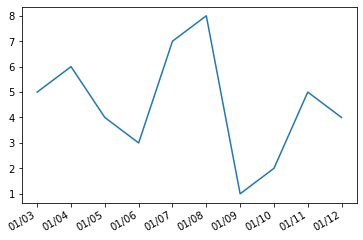

In [76]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

myDates = [datetime(2012,1,i+3) for i in range(10)]
myValues = [5,6,4,3,7,8,1,2,5,4]
fig, ax = plt.subplots()
ax.plot(myDates,myValues)

myFmt = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()
plt.show()